# Google Stock Price Prediction Using LSTM

### Step 1: Importing the Libraries

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_64381/3112862747.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Step 2: Getting to Visualising the Stock Market Prediction Data

In [3]:
#Get the Dataset
df=pd.read_csv("data.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_64381/2516917325.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("data.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


### Step 3: Checking for Null Values by Printing the DataFrame Shape

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (4431, 6)
Null Value Present:  False


### Step 4: Plotting the True Adjusted Close Value

<Axes: xlabel='Date'>

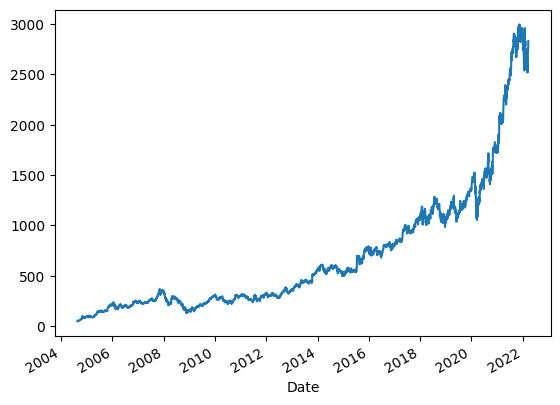

In [5]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

### Step 5: Setting the Target Variable and Selecting the Features

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

### Step 6: Scaling

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2004-08-19,0.000136,0.000390,0.000000,0.541020
2004-08-20,0.000306,0.001233,0.000776,0.273840
2004-08-23,0.001945,0.001972,0.002236,0.217793
2004-08-24,0.002027,0.001656,0.001300,0.180959
2004-08-25,0.000971,0.001051,0.001353,0.106788


### Step 7: Creating a Training Set and a Test Set for Stock Market Prediction

In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

### Step 8: Data Processing For LSTM

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

### Step 9: Building the LSTM Model for Stock Market Prediction

In [10]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 10: Training the Stock Market Prediction Model

In [14]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 11.6184
Epoch 2/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 12.5391
Epoch 3/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 11.7683
Epoch 4/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 11.8736
Epoch 5/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 12.0726
Epoch 6/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 12.2410
Epoch 7/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 12.3586
Epoch 8/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 12.4299
Epoch 9/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 12.4651
Epoch 10/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 12.4735
Epoch 11/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 12.4631
Epoch 12/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 12.4405
Epoch 13/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 12.4099
Epoch 14/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 12.3741
E

### Step 11: Making the LSTM Prediction

In [12]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### Step 12: Comparing Predicted vs True Adjusted Close Value – LSTM

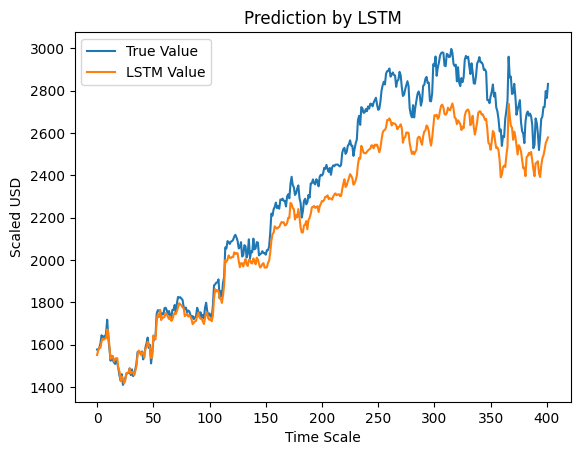

In [13]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()